In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/pet-supplies/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pet-supplies/pet_supplies_2212.csv


### This Project covers the following
1. Data Description
2. DataSet
3. Data Wrangling
4. Data Exploratory Analysis

PetMind is a retailer of products for pets. They are based in the United States. PetMind sells products that are a mix of luxury items and everyday items. Luxury items include toys. Everyday items include food.

The company wants to increase sales by selling more everyday products repeatedly. They have been testing this approach for the last year.They now want a report on how repeat purchases impact sales.

### DataSet Description

The dataset contains the sales records in the stores last year.
The dataset can be downloaded from here.
Column Name Criteria

***product_id*** - The unique identifier of the product.

***category*** - The category of the product, one of 6 values                       (Housing, Food, Toys, Equipment, Medicine,                            Accessory).

***animal*** - The type of animal the product is for. One of Dog,                  Cat, Fish, Bird.

***size*** - The size of animal the product is for. Small, Medium,
              Large.

***price*** - The price the product is sold at. Can be any positive
              value, round to 2 decimal places.

***sales*** - The value of all sales of the product in the last                    year. This can be any positive value, rounded to 2                  decimal places

***rating*** - Customer rating of the product from 1 to 10

***repeat_purchase*** - Whether customers repeatedly buy the product                         (1) or not (0)


### Research Questions

1. State which category of the variable repeat purchases has the        most observations
2. Describe the distribution of all of the sales.
3. Describe the relationship between repeat purchases and sales. 


## Data Wrangling

In [2]:
#Importing Packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Loading dataset
df = pd.read_csv('/kaggle/input/pet-supplies/pet_supplies_2212.csv')
#checking for the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [4]:
#check for shape
df.shape


(1500, 8)

In [5]:
#checking for unique characters
df.nunique()

product_id         1500
category              7
animal                4
size                  9
price               707
sales              1476
rating                9
repeat_purchase       2
dtype: int64

In [6]:
#checking for missing values in the dataset
df.isnull().sum()

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64

In [7]:
#Data sample
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


In [8]:
#Descirption of the dataset
df.describe()

,product_id,sales,rating,repeat_purchase
count,1500.000000,1500.000000,1350.000000,1500.000000
mean,750.500000,996.597847,4.991111,0.604000
std,433.157015,323.952676,1.559755,0.489228
min,1.000000,286.940000,1.000000,0.000000
25%,375.750000,747.420000,4.000000,0.000000
50%,750.500000,1000.830000,5.000000,1.000000
75%,1125.250000,1158.157500,6.000000,1.000000
max,1500.000000,2255.960000,9.000000,1.000000


### Data Cleaning

In [9]:
#checking for unique values in the category column
df['category'].unique()

array(['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory',
       '-'], dtype=object)

In [10]:
#Replacing '-' with 'unknown' in the category column
df['category'] = df['category'].replace(['-'], 'unknown')

In [11]:
#checking to effect change
df['category'].unique()

array(['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory',
       'unknown'], dtype=object)

In [12]:
#checking for unique values in the size column
df['size'].unique()

array(['large', 'MEDIUM', 'medium', 'small', 'Small', 'Large', 'SMALL',
       'Medium', 'LARGE'], dtype=object)

In [13]:
#Changing all data in size column to lowercase
df['size'] = df['size'].str.lower()

In [14]:
#checking to effect change
df['size'].unique()

array(['large', 'medium', 'small'], dtype=object)

In [15]:
#Sampling the price column
df['price'].sample(10)

824     30.98
1214    19.78
1205    29.06
1387    32.82
794     31.06
1418    31.13
553     22.97
1010    20.02
810     40.92
148     27.77
Name: price, dtype: object

In [16]:
#Replacing 'unlisted' str with '0' int
df['price'] = df['price'].replace(['unlisted'], '0')

In [17]:
#calculating the median of the price column
df['price'].median()

27.93

In [18]:
#Replacing '0' with the median 27.93
df['price'] = df['price'].replace(['0'], 27.93)

In [19]:
#checking to effect change
df['price'].sample(10)

1451    22.92
1025    30.98
699     36.21
372     18.12
604      28.1
349     30.73
1243    31.03
367     30.89
993     28.24
612     30.08
Name: price, dtype: object

In [20]:
#Sampling Sales Column
df['sales'].sample(10)

1487     663.56
1073    1346.37
1195     991.31
800      742.48
1315     743.94
940     1488.93
431     1062.62
725      822.82
878      538.59
362      700.94
Name: sales, dtype: float64

In [21]:
#Checking for unique characters in the rating column
df['rating'].unique()

array([ 7.,  6.,  5.,  4.,  8.,  1.,  3., nan,  2.,  9.])

In [22]:
#Replacing Missing values(Nan) with 0
df['rating'] = df['rating'].fillna(0)

In [23]:
#Checking to Effect Change
df['rating'].unique()

array([7., 6., 5., 4., 8., 1., 3., 0., 2., 9.])

## Exploratory Data Analysis

#### Research Question 1: State which category of the variable repeat purchases has the most observations

In [24]:
df['repeat_purchase'].value_counts()

1    906
0    594
Name: repeat_purchase, dtype: int64

Text(0, 0.5, 'Count')

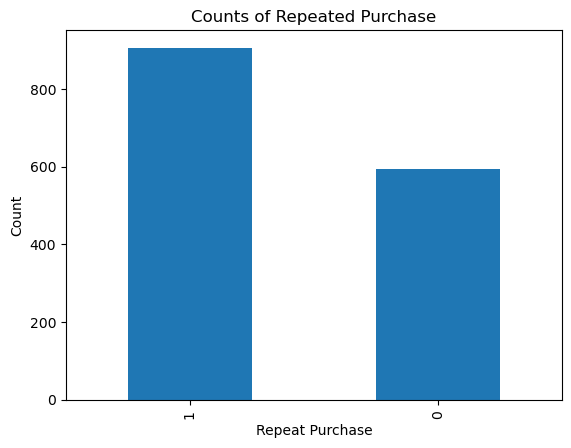

In [25]:
x_axis = ['repeat purchase', 'single purchase']
df['repeat_purchase'].value_counts().plot(y='Purchase Count', kind='bar', title='Counts of Repeated Purchase');
plt.xlabel('Repeat Purchase')
plt.ylabel('Count')

There are two types of variable included in the data type. Whether customers repeatedly buy a product (1) or not (0). From the Bar chat we can deduce that repeated buy (1) is the most common with a count of 906 and single purchasse (0) with a count of 594.The categories are unbalanced. The team should focus on more on repeated buy since they are more common.

#### Research Question 2: Describe the distribution of all of the sales.

Text(0, 0.5, 'Counts')

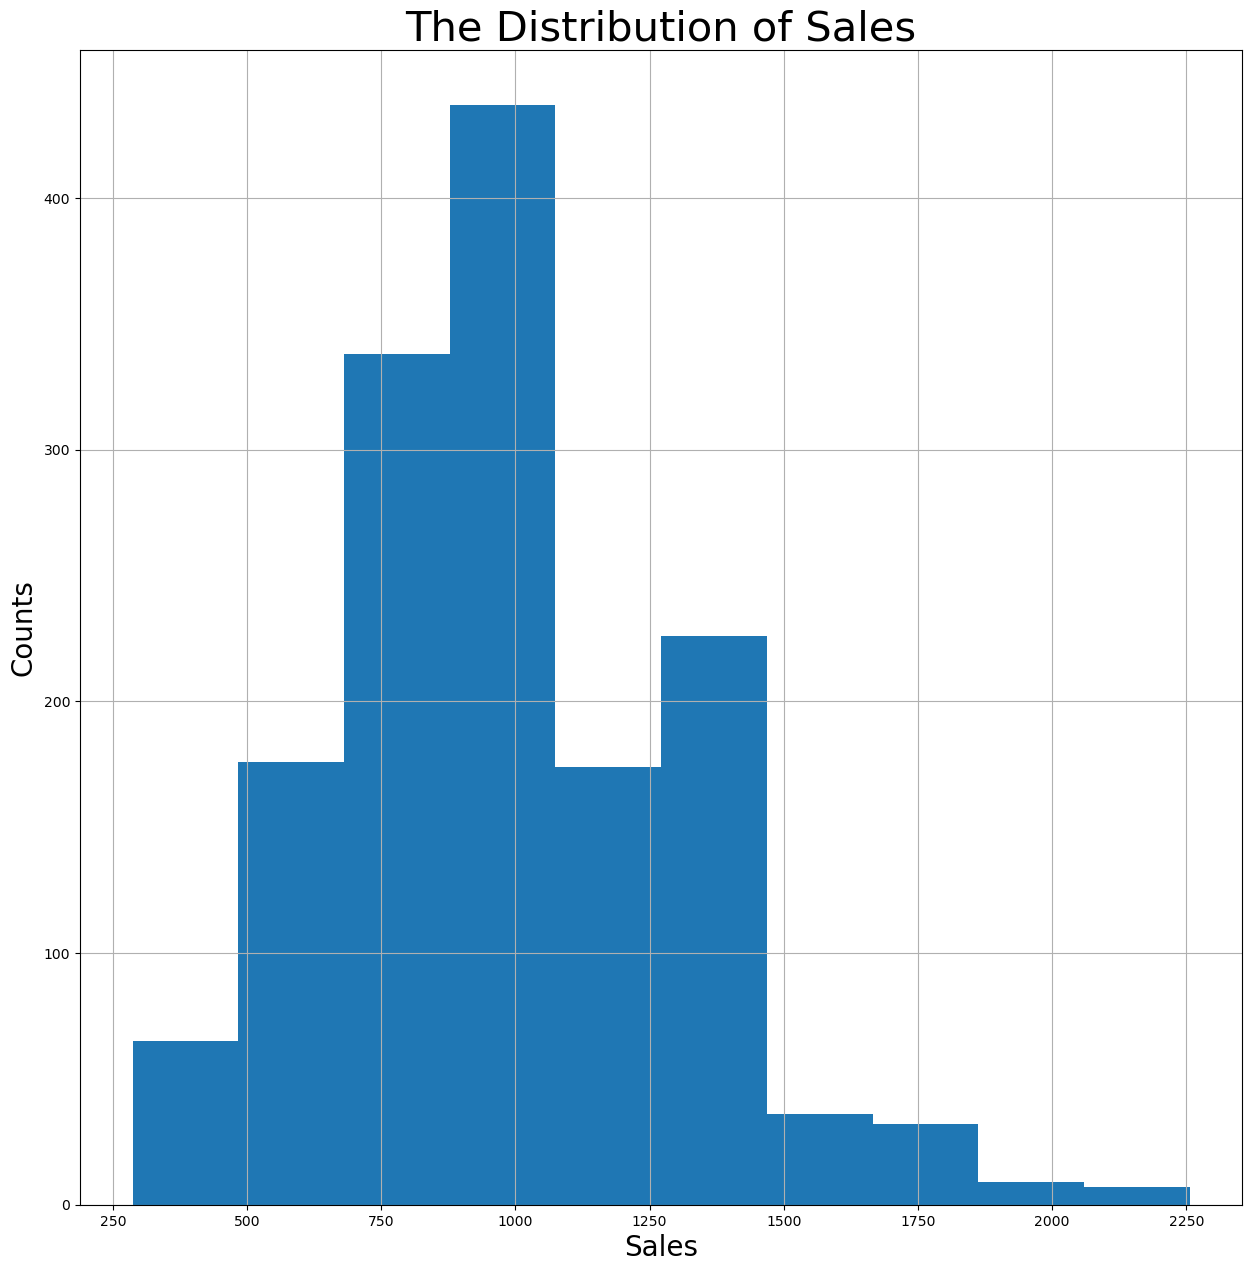

In [26]:
df['sales'].hist(figsize=(15,15))
plt.title('The Distribution of Sales', fontsize=30);
plt.xlabel('Sales', fontsize=20)
plt.ylabel('Counts', fontsize=20)

From the histogram above, we can see that the distribution is right skewed. The graph also shows concentration of sales between 700 and 1050. This shows that customers spends more between the range of 700 to 1050. The team should focus on products within this sales ranges for more purchase. Sales above 1300 showed a very low turnout.

#### Research Question 3: Describe the relationship between repeat purchases and sales. 

Text(0, 0.5, 'Sales')

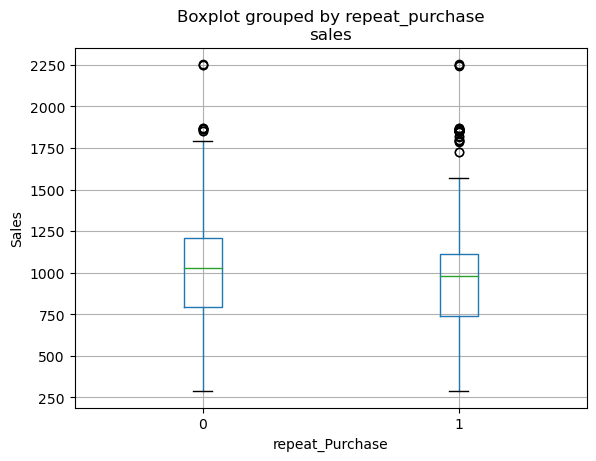

In [27]:
df.boxplot(by ='repeat_purchase', column =['sales'], grid = True)
plt.xlabel('repeat_Purchase', fontsize=10)
plt.ylabel('Sales', fontsize=10)

Finally, We want to take a look at the relationship between Sales and Repeated purchase to see what influence the repeat purchas has on the sales. From the boxplot above we can deduct several information. Both repeat buy(1) and single buy(0) have several outliers with repeat purchase having more outliers. The single buy(0) covers a wider sales range and have a higher interquartile compared to repeat buy(1). Both have 50% sales between 700 and 1200.